In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.stats import norm
from scipy.interpolate import interp1d
import lmfit

In [2]:
dt = np.float64(1e-5)
D = 1.0
L = 10
N = 20
length = np.int(1e5)

1e-05

In [3]:
x = 2*L*np.random.random(size=(N,))
steps = np.random.normal(loc=0.0,scale=np.sqrt(2*D*dt),size=(N,length))
x = np.column_stack((x,steps))
paths = np.mod(np.cumsum(x,axis=1),2*L)-L
intensity = norm.pdf(paths,loc=0)
intensity = np.sum(intensity,axis=0)

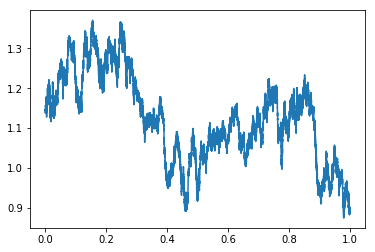

In [4]:
tt = np.arange(length+1)*dt
plt.plot(tt,intensity)

In [5]:
intensity_interp = interp1d(tt,intensity*10000)
t = 0
delta_t_list=[]
while t < tt[-1]:
    current_int = intensity_interp(t)
    delta_t = np.random.exponential(1/current_int)
    delta_t_list.append(delta_t)
    t = t + delta_t

In [6]:
delta_t_list = np.array(delta_t_list)
delta_t_list.sort(axis=0)

(array([3.400e+03, 2.365e+03, 1.708e+03, 1.163e+03, 7.630e+02, 5.880e+02,
        3.850e+02, 2.620e+02, 1.880e+02, 1.480e+02, 8.500e+01, 5.900e+01,
        5.000e+01, 2.700e+01, 2.200e+01, 2.200e+01, 1.100e+01, 5.000e+00,
        1.000e+00, 2.000e+00, 7.000e+00, 1.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([3.79432569e-09, 3.20201035e-05, 6.40364126e-05, 9.60527218e-05,
        1.28069031e-04, 1.60085340e-04, 1.92101649e-04, 2.24117958e-04,
        2.56134268e-04, 2.88150577e-04, 3.20166886e-04, 3.52183195e-04,
        3.84199504e-04, 4.16215813e-04, 4.48232123e-04, 4.80248432e-04,
        5.12264741e-04, 5.44281050e-04, 5.76297359e-04, 6.08313668e-04,
        6.40329977e-04, 6.72346287e-04, 7.04362596e-04, 7.36378905e-04,
        7.68395214e-04, 8.00411523e-04, 8.32427832e-04, 8.64444142e-04,
        8.96460451e-04, 9.28476760e-04, 9.60493069e-04]),
 <a list of 30 Patch objects>)

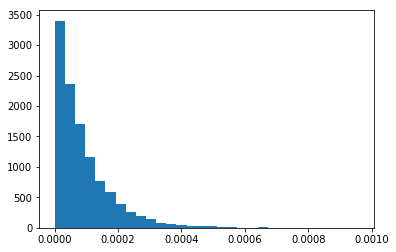

In [7]:
plt.hist(delta_t_list,bins=30)

In [8]:
def p_dt_int(x,flux):
    return np.exp(-flux*x)/np.sqrt(-np.log(x))

In [9]:
def p_dt(flux):
    return np.array([quad(p_dt_int,0,1,args=(f))[0] for f in flux])

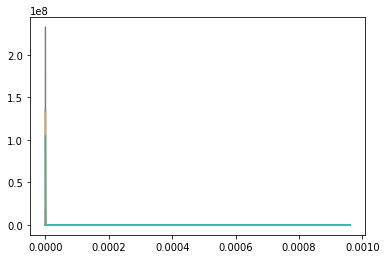

In [12]:
I0 = 10
for i in range(10):
    I0 = I0*10
    liklihood = p_dt(I0*delta_t_list)*I0
    plt.plot(delta_t_list,liklihood)

In [11]:
I0

100000000000000000000000

In [65]:
p = lmfit.Parameters()
p.add('I0',value=1)
N = len(delta_t_list)
def residual(p):
    return -N*np.log(p['I0'])-np.sum(np.log(p_dt(p['I0']*delta_t_list[100:200])))

In [66]:
mini = lmfit.Minimizer(residual,p,nan_policy='omit')
out1 = mini.minimize(method='Nelder')
lmfit.report_fit(out1.params, min_correl=0.5)

[[Variables]]
    I0:  1.6642e+09 (init = 1)


C:\Users\mebra\Anaconda3\lib\site-packages\lmfit\minimizer.py:335: RuntimeWarning: divide by zero encountered in double_scalars
  self.redchi = self.chisqr / self.nfree


In [67]:
N

2697

In [72]:
length

100000.0